In [30]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt;
dados = pd.read_csv("Producao_Bruta.csv", encoding='latin1')
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 14 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   Ano base                                                                5896 non-null   int64 
 1   UF                                                                      5896 non-null   object
 2   Classe Substância                                                       5896 non-null   object
 3   Substância Mineral                                                      5896 non-null   object
 4   Quantidade Produção - Minério ROM (t)                                   5896 non-null   object
 5   Quantidade Contido                                                      5896 non-null   object
 6   Unidade de Medida - Contido                                             5896 non-null   

In [20]:
dados.head()

,Ano base,UF,Classe Substância,Substância Mineral,Quantidade Produção - Minério ROM (t),Quantidade Contido,Unidade de Medida - Contido,Indicação Contido,Quantidade Venda (t),Valor Venda (R$),Quantidade Transformação / Consumo / Utilização (t),Valor Transformação / Consumo / Utilização nesta mina (R$),Quantidade Transferência para Transformação / Utilização / Consumo (t),Valor Transferência para Transformação / Utilização / Consumo (R$)
0,2010,AC,Não-Metálicos,Areia,"155024,500000",",000000000000000",-,NaN,"127314,03","2400373,5299999998",",000000",",000000",",000000",",000000"
1,2010,AL,Não-Metálicos,Rochas (Britadas) e Cascalho,"808072,600000",",000000000000000",-,NaN,0,0,",000000",",000000",",000000",",000000"
2,2010,AL,Não-Metálicos,Rochas Ornamentais,"78,000000",",000000000000000",-,NaN,72,2376,",000000",",000000",",000000",",000000"
3,2010,AL,Não-Metálicos,Areia,"108938,810000",",000000000000000",-,NaN,"87835,169999999998","1258464,05","15569,000000","103555,700000",",000000",",000000"
4,2010,AL,Não-Metálicos,Calcário,"1006305,330000",",000000000000000",-,NaN,0,0,",000000",",000000",",000000",",000000"


In [43]:
#Lista das colunas numéricas
colunas_numericas = [
    'Quantidade Produção - Minério ROM (t)',
    'Quantidade Contido',
    'Quantidade Venda (t)',
    'Valor Venda (R$)',
    'Quantidade Transformação / Consumo / Utilização (t)',
    'Valor Transformação / Consumo / Utilização nesta mina (R$)',
    'Quantidade Transferência para Transformação / Utilização / Consumo (t)',
    'Valor Transferência para Transformação / Utilização / Consumo (R$)'
]

for col in colunas_numericas:
    dados[col] = dados[col].astype(str).str.replace(",",".")
    dados[col] = dados[col].astype(pd.Float64Dtype())

# Verificar se funcionou
print(dados.info())
print(dados.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 14 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Ano base                                                                5896 non-null   int64  
 1   UF                                                                      5896 non-null   object 
 2   Classe Substância                                                       5896 non-null   object 
 3   Substância Mineral                                                      5896 non-null   object 
 4   Quantidade Produção - Minério ROM (t)                                   5896 non-null   Float64
 5   Quantidade Contido                                                      5896 non-null   Float64
 6   Unidade de Medida - Contido                                             5896 non

Ano base
2010        2242877361.39
2011        3230439702.76
2012        3481048253.48
2013        3679905484.18
2014        3872396242.73
2015        3523164593.85
2016        3215481354.38
2017        3107249102.98
2018        3529372268.01
2019        3965124272.94
2020        5271770099.38
2021         7912941714.2
2022       10577607784.01
2023       9842251993.774
2024    9876481619.982704
Name: Valor Venda (R$), dtype: Float64


Text(0, 0.5, 'toneladas')

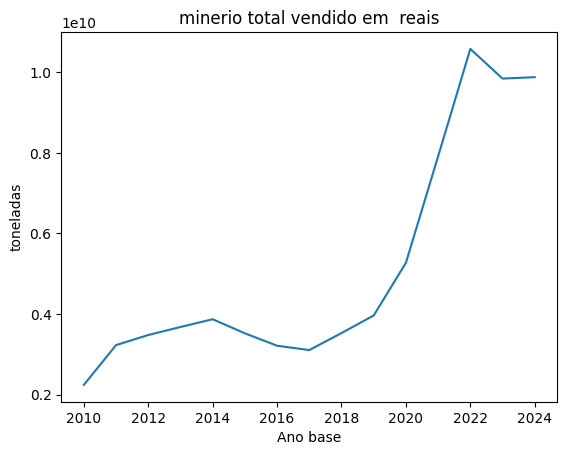

In [52]:
toneladaporano  = dados.groupby("Ano base")["Valor Venda (R$)"].sum()
print(toneladaporano)

sns.lineplot(x = toneladaporano.index, y = toneladaporano.values)
plt.title("minerio total vendido em  reais")
plt.ylabel("toneladas")



Ano base
2010      540518.6
2011    1019768.94
2012    1306139.53
2013    1702254.32
2014    1691904.13
2015    1228443.21
2016     726957.77
2017     440050.29
2018     407277.55
2019     450220.17
2020     352817.57
2021    1135984.69
2022    1505071.12
2023     910415.03
2024    1980331.78
Name: Quantidade Venda (t), dtype: Float64


Text(0, 0.5, 'toneladas')

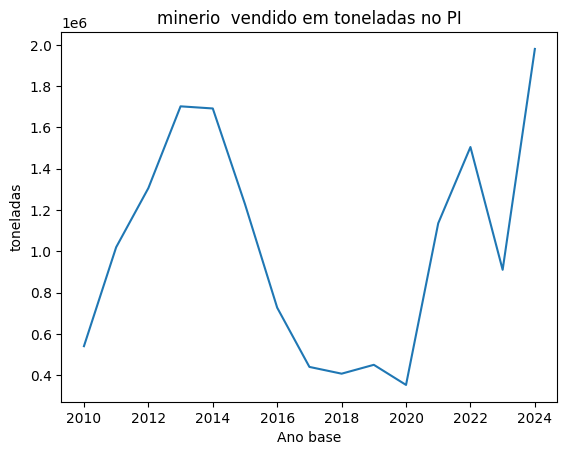

In [54]:

tpa_piuaui = dados[dados["UF"] == "PI"]

tpa_piaui  = tpa_piuaui.groupby("Ano base")["Quantidade Venda (t)"].sum()
print(tpa_piaui)

sns.lineplot(x = tpa_piaui.index, y = tpa_piaui.values)
plt.title("minerio  vendido em toneladas no PI")
plt.ylabel("toneladas")

